**Analisi e Cleaning dei dati salvati**

Importiamo il file salvato in precedenza salvandolo su un DataFrame. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from pandas.tools.plotting import scatter_matrix
pd.set_option('display.max_columns', 500)


In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("../../datasets/salute/osservatori_comuni_cleaned.csv")

In [4]:
df.shape

(2256, 26)

In [5]:
df.head(5)

Unnamed: 0    comune  year  Produzione pro-capite Rifiuti Urbani  \
0           0  Capolona  2007                            515.818354   
1           1  Capolona  2008                            490.842027   
2           2  Capolona  2009                            439.304991   
3           3  Capolona  2010                            389.532185   
4           4  Capolona  2011                            414.453906   

   Reddito imponibile medio per contribuente  \
0                               18679.973587   
1                               18771.549645   
2                               19125.981512   
3                               19690.693186   
4                               20011.717264   

   Numero medio componenti per famiglie  % di Raccolta Differenziata  \
0                              2.630662                    15.614981   
1                              2.600775                    18.121024   
2                              2.584806                    40.819392   
3                              2.562732                    58.694205   
4                              5.023481                    59.460087   

   Reddito imponibile medio per residente  \
0                            10571.769347   
1                            10847.493852   
2                            10899.334751   
3                            10950.381868   
4                            11372.819696   

   Rapporto tra avviamenti/cessazioni (x 100)  \
0                                         NaN   
1                                   91.458607   
2                                   97.394137   
3                                  115.226940   
4                                  100.405954   

   Rapporto tra avviamenti/cessazioni di stranieri (x 100)  \
0                                                NaN         
1                                          97.260274         
2                                         112.500000         
3                                         121.678322         
4                                         119.685039         

   Tasso grezzo di disoccupazione (x100)  \
0                                    NaN   
1                              12.541899   
2                              14.962594   
3                              14.793702   
4                              18.481013   

   Tasso grezzo di disoccupazione stranieri (x100)  \
0                                              NaN   
1                                        17.151163   
2                                        23.699422   
3                                        21.234568   
4                                        28.318584   

   Quoziente di incremento totale (x 1.000)  \
0                                 15.137181   
1                                 15.461997   
2                                  7.763401   
3                                 19.038985   
4                                 -5.923732   

   Percentuale nati di cittadinanza non italiana  \
0                                      12.500000   
1                                       6.976744   
2                                      22.000000   
3                                      17.073171   
4                                      19.565217   

   Tasso di pensioni sociali e assegni sociali (x 100)  \
0                                           4.408818     
1                                           4.474708     
2                                           4.653371     
3                                           4.452690     
4                                           4.155375     

   Percentuale studenti con esito negativo - secondaria II grado  \
0                                                NaN               
1                                          14.468085               
2                                          16.299559               
3                                          11.885246               
4                                       

Il DataFrame contiene 2256 record e alcune celle contengono dei valori NaN.  

**Esplorazione dati - Correlazioni**

Esploriamo le correlazioni tra una particolare variabile (Percentuale di Raccolta Differenziata) e le altre. 

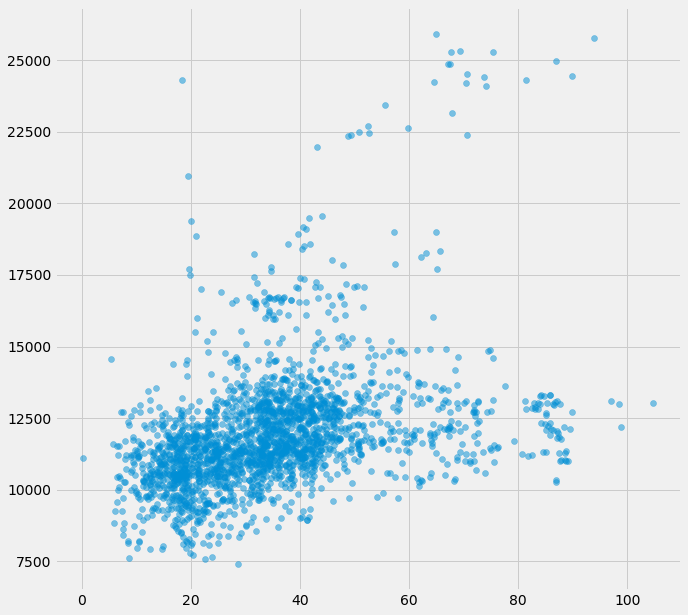

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Reddito imponibile medio per residente"],alpha=0.5)
plt.show()

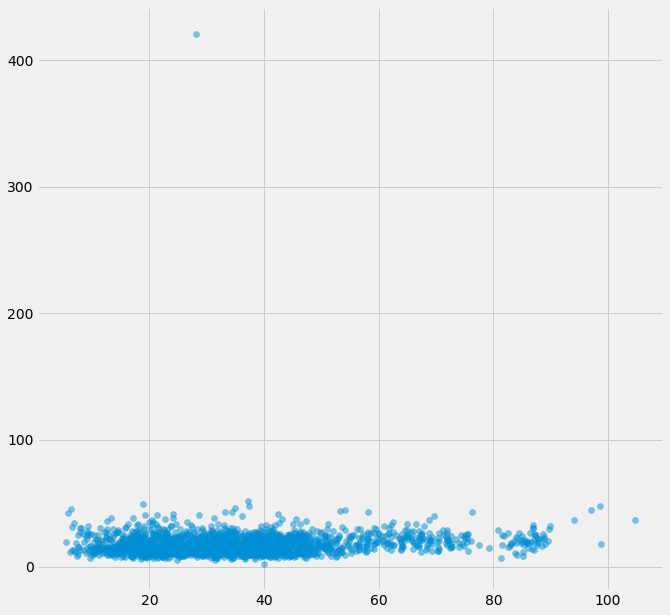

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Tasso grezzo di disoccupazione (x100)"],alpha=0.5)
plt.show()

In [8]:
df[df["Tasso grezzo di disoccupazione (x100)"]>100]

Unnamed: 0                     comune  year  \
999         999  Montecatini Val di Cecina  2014   

     Produzione pro-capite Rifiuti Urbani  \
999                            743.347851   

     Reddito imponibile medio per contribuente  \
999                               19761.869522   

     Numero medio componenti per famiglie  % di Raccolta Differenziata  \
999                               2.10119                    28.141685   

     Reddito imponibile medio per residente  \
999                            11222.238122   

     Rapporto tra avviamenti/cessazioni (x 100)  \
999                                   81.795116   

     Rapporto tra avviamenti/cessazioni di stranieri (x 100)  \
999                                         101.211143         

     Tasso grezzo di disoccupazione (x100)  \
999                              420.76555   

     Tasso grezzo di disoccupazione stranieri (x100)  \
999                                      1311.570248   

     Quoziente di incremento totale (x 1.000)  \
999                                -14.140271   

     Percentuale nati di cittadinanza non italiana  \
999                                       6.666667   

     Tasso di pensioni sociali e assegni sociali (x 100)  \
999                                           2.238806     

     Percentuale studenti con esito negativo - secondaria II grado  \
999                                                NaN               

     Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione  \
999                                                NaN                                                                

     Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione  \
999                                                NaN                                                                         

     Percentuale di avviamenti a termine  \
999                              70.7057   

     Percentuale studenti con esito negativo - secondaria I grado  \
999                                                NaN              

     Numero interventi di controllo per abitante  \
999                                     8.333333   

     Tasso di famiglie che chiedono integrazione canoni di locazione (x 1000)  \
999                                                NaN                          

     Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado  \
999                                                NaN                               

     Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado  \
999                                         286.631016                                 

     Indice di vecchiaia (x 100)  Quoziente di incremento naturale (x 1.000)  
999                    -9.615385                                         NaN

Una riga presenta un Tasso di disoccupazione sopra il 100%. E' un valore che non ha senso, probabilmente un errore di input dati.
Sostituiamo il valore in quella cella con un NaN e controlliamo che la sostituzione sia andata a buon fine. 

In [9]:
df.set_value(999,'Tasso grezzo di disoccupazione (x100)',np.nan)
df[999:1000]['Tasso grezzo di disoccupazione (x100)']

999   NaN
Name: Tasso grezzo di disoccupazione (x100), dtype: float64

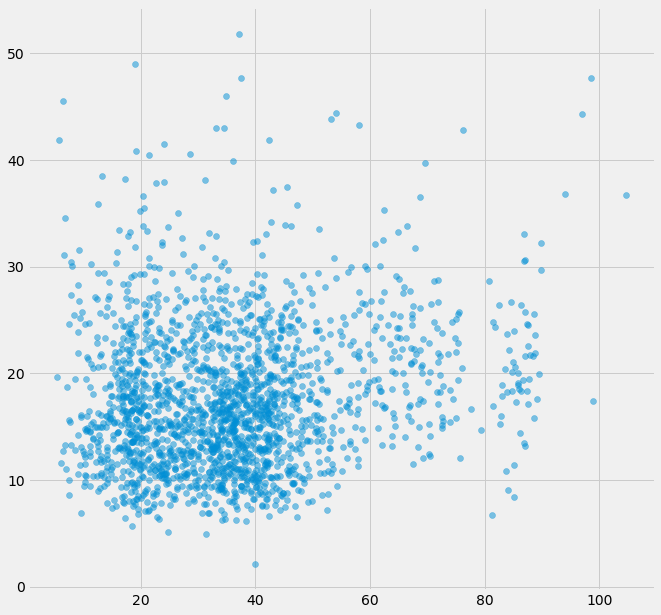

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Tasso grezzo di disoccupazione (x100)"],alpha=0.5)
plt.show()

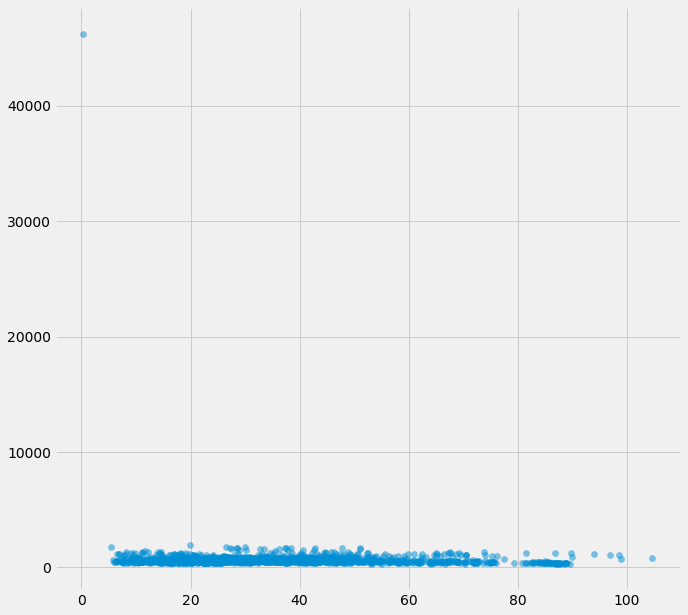

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Produzione pro-capite Rifiuti Urbani"],alpha=0.5)
plt.show()

In [12]:
df[df["Produzione pro-capite Rifiuti Urbani"]>10000]

Unnamed: 0        comune  year  Produzione pro-capite Rifiuti Urbani  \
280         280  Pratovecchio  2007                          46257.448429   

     Reddito imponibile medio per contribuente  \
280                                19301.06674   

     Numero medio componenti per famiglie  % di Raccolta Differenziata  \
280                               2.24818                     0.294661   

     Reddito imponibile medio per residente  \
280                            11105.310695   

     Rapporto tra avviamenti/cessazioni (x 100)  \
280                                         NaN   

     Rapporto tra avviamenti/cessazioni di stranieri (x 100)  \
280                                                NaN         

     Tasso grezzo di disoccupazione (x100)  \
280                                    NaN   

     Tasso grezzo di disoccupazione stranieri (x100)  \
280                                              NaN   

     Quoziente di incremento totale (x 1.000)  \
280                                 12.059664   

     Percentuale nati di cittadinanza non italiana  \
280                                      42.857143   

     Tasso di pensioni sociali e assegni sociali (x 100)  \
280                                           2.470741     

     Percentuale studenti con esito negativo - secondaria II grado  \
280                                                NaN               

     Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione  \
280                                                NaN                                                                

     Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione  \
280                                                NaN                                                                         

     Percentuale di avviamenti a termine  \
280                                  NaN   

     Percentuale studenti con esito negativo - secondaria I grado  \
280                                                NaN              

     Numero interventi di controllo per abitante  \
280                                          NaN   

     Tasso di famiglie che chiedono integrazione canoni di locazione (x 1000)  \
280                                          13.828239                          

     Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado  \
280                                                NaN                               

     Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado  \
280                                                NaN                                 

     Indice di vecchiaia (x 100)  Quoziente di incremento naturale (x 1.000)  
280                   213.611111                                   -4.443034

Una riga presenta una Produzione rifiuti Urbani fuori scala. 
Sostituiamo anche qui con NaN e controlliamo di nuovo il plot.

280   NaN
Name: Produzione pro-capite Rifiuti Urbani, dtype: float64


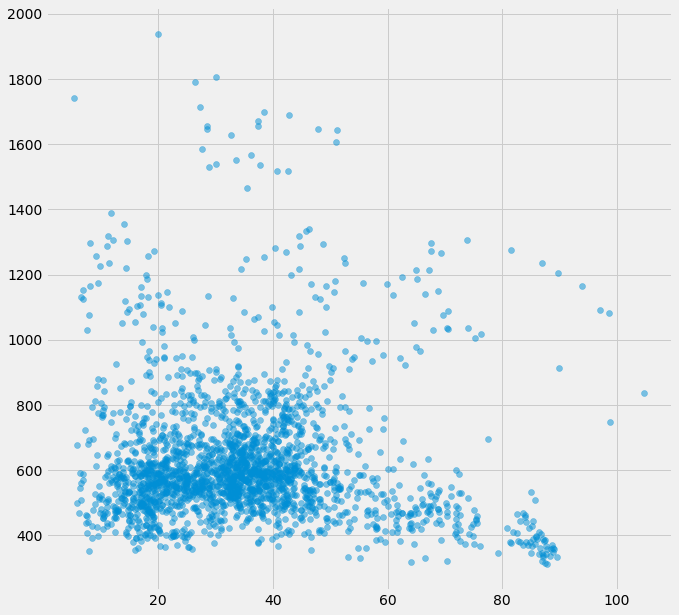

In [13]:
df.set_value(280,'Produzione pro-capite Rifiuti Urbani',np.nan)
print df[280:281]['Produzione pro-capite Rifiuti Urbani']
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Produzione pro-capite Rifiuti Urbani"],alpha=0.5)
plt.show()

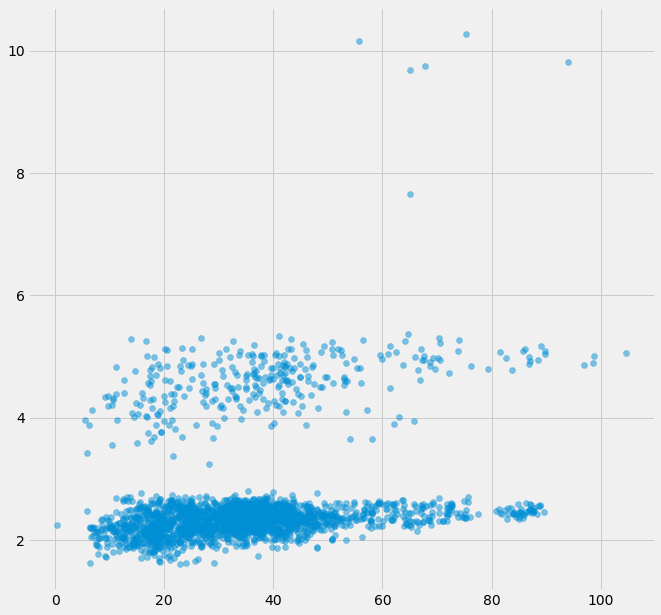

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Numero medio componenti per famiglie"],alpha=0.5)
plt.show()

In [15]:
df[df["Numero medio componenti per famiglie"]>4]

Unnamed: 0                   comune  year  \
4              4                 Capolona  2011   
12            12                 Bibbiena  2011   
20            20                Scandicci  2011   
28            28      Santa Maria a Monte  2011   
32            32      Casciana Terme Lari  2007   
33            33      Casciana Terme Lari  2008   
34            34      Casciana Terme Lari  2009   
35            35      Casciana Terme Lari  2010   
36            36      Casciana Terme Lari  2011   
37            37      Casciana Terme Lari  2012   
38            38      Casciana Terme Lari  2013   
44            44      Castagneto Carducci  2011   
52            52                   Cecina  2011   
60            60              Montevarchi  2011   
68            68   Terranuova Bracciolini  2011   
76            76                 Peccioli  2011   
84            84                   Vaiano  2011   
92            92                 Ponsacco  2011   
100          100                Pontedera  2011   
108          108              Vagli Sotto  2011   
116          116               Santa Luce  2011   
124          124       Villa Collemandina  2011   
132          132                Capannori  2011   
136          136   Fabbriche di Vergemoli  2007   
137          137   Fabbriche di Vergemoli  2008   
140          140   Fabbriche di Vergemoli  2011   
148          148                    Lucca  2011   
156          156                  Porcari  2011   
164          164           Villa Basilica  2011   
172          172           Bagni di Lucca  2011   
...          ...                      ...   ...   
2050        2050    Scarperia e San Piero  2009   
2051        2051    Scarperia e San Piero  2010   
2052        2052    Scarperia e San Piero  2011   
2053        2053    Scarperia e San Piero  2012   
2054        2054    Scarperia e San Piero  2013   
2060        2060         Capraia e Limite  2011   
2068        2068         Castelfiorentino  2011   
2076        2076            Cerreto Guidi  2011   
2084        2084                 Certaldo  2011   
2092        2092                   Empoli  2011   
2100        2100                Fucecchio  2011   
2108        2108           Gambassi Terme  2011   
2116        2116                Montaione  2011   
2124        2124     Montelupo Fiorentino  2011   
2132        2132            Montespertoli  2011   
2140        2140                    Vinci  2011   
2148        2148    Castelfranco di Sotto  2011   
2156        2156  Montopoli in Val d'Arno  2011   
2164        2164              San Miniato  2011   
2172        2172    Santa Croce sull'Arno  2011   
2180        2180                 Camaiore  2011   
2188        2188          Forte dei Marmi  2011   
2196        2196                Massarosa  2011   
2204        2204              Pietrasanta  2011   
2212        2212                Seravezza  2011   
2220        2220                 Stazzema  2011   
2228        2228                Viareggio  2011   
2236        2236                    Prato  2011   
2244        2244               Montemurlo  2011   
2252        2252                   Vernio  2011   

      Produzione pro-capite Rifiuti Urbani  \
4                               414.453906   
12                              552.362704   
20                              556.335525   
28                              476.209013   
32                             1294.043248   
33                             1236.147548   
34                             1170.967794   
35                             1087.375569   
36                             1029.515347   
37                             1075.940578   
38                             1018.507020   
44                             1124.538798   
52                              703.501272   
60                              602.551672   
68                              610.933106   
76                              550.794809   
84                              482.393893   
92             

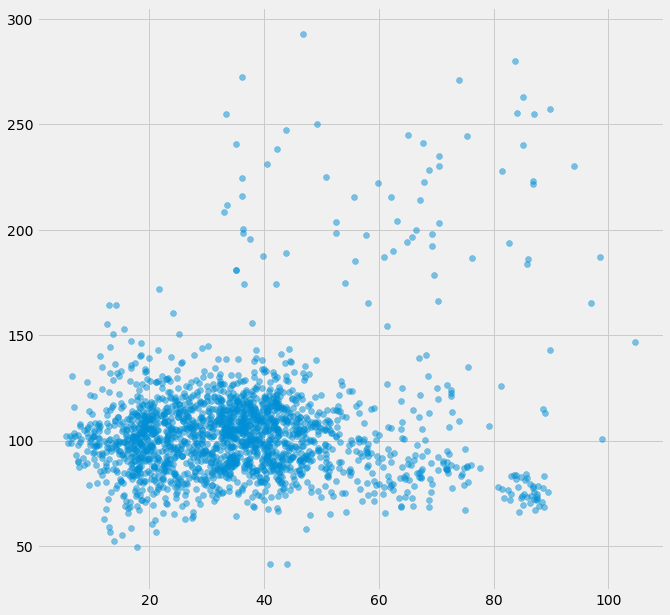

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Rapporto tra avviamenti/cessazioni (x 100)"],alpha=0.5)
plt.show()

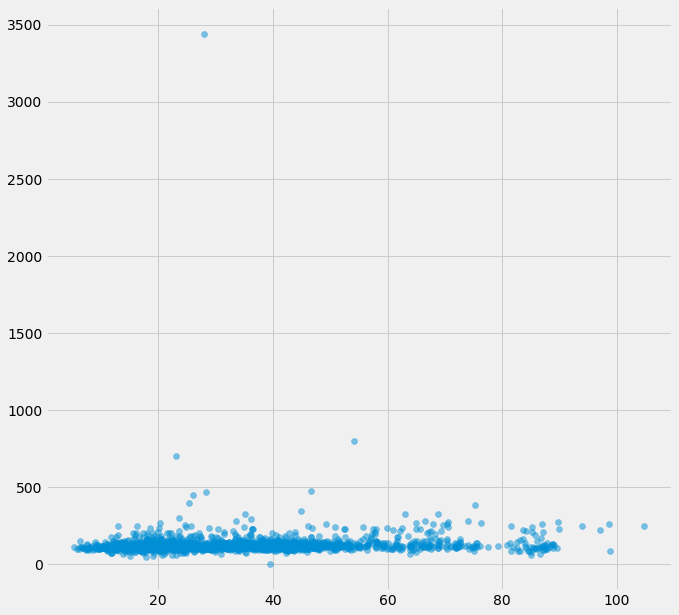

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Rapporto tra avviamenti/cessazioni di stranieri (x 100)"],alpha=0.5)
plt.show()

In [18]:
df[df["Rapporto tra avviamenti/cessazioni di stranieri (x 100)"]>500]

Unnamed: 0                     comune  year  \
142         142     Fabbriche di Vergemoli  2013   
874         874                  Careggine  2009   
997         997  Montecatini Val di Cecina  2012   

     Produzione pro-capite Rifiuti Urbani  \
142                            948.141809   
874                            543.719008   
997                            676.108049   

     Reddito imponibile medio per contribuente  \
142                               19092.842105   
874                               16708.638158   
997                               19423.715116   

     Numero medio componenti per famiglie  % di Raccolta Differenziata  \
142                              3.651786                    54.083138   
874                              2.108014                    23.112935   
997                              2.084005                    28.032712   

     Reddito imponibile medio per residente  \
142                             9756.488998   
874                             8395.745455   
997                            11050.316428   

     Rapporto tra avviamenti/cessazioni (x 100)  \
142                                  175.000000   
874                                  100.000000   
997                                   77.188329   

     Rapporto tra avviamenti/cessazioni di stranieri (x 100)  \
142                                         800.000000         
874                                         700.000000         
997                                        3442.857143         

     Tasso grezzo di disoccupazione (x100)  \
142                              44.395604   
874                              18.956044   
997                              22.069597   

     Tasso grezzo di disoccupazione stranieri (x100)  \
142                                        73.076923   
874                                        30.000000   
997                                        37.000000   

     Quoziente di incremento totale (x 1.000)  \
142                                -31.784841   
874                                -18.181818   
997                                  2.756340   

     Percentuale nati di cittadinanza non italiana  \
142                                            NaN   
874                                       0.000000   
997                                      18.181818   

     Tasso di pensioni sociali e assegni sociali (x 100)  \
142                                          12.080537     
874                                          12.169312     
997                                           2.962963     

     Percentuale studenti con esito negativo - secondaria II grado  \
142                                          20.000000               
874                                           0.000000               
997                                           9.615385               

     Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione  \
142                                                NaN                                                                
874                                                NaN                                                                
997                                                NaN                                                                

     Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione  \
142                                                NaN                                                                         
874                                                NaN                                                                         
997                                                NaN                                                                         

     Percentuale di avviamenti a termine  \
142                           140.259740   
874                            67.391304  

Il valore di Montecatini (indice=997) è un po' sospetto ma non abbastanza da giustificare l'eliminazione. 
Potrebbero essere state aperte 34 nuove imprese da stranieri in un soo anno. Poco probabile ma non impossibile. 

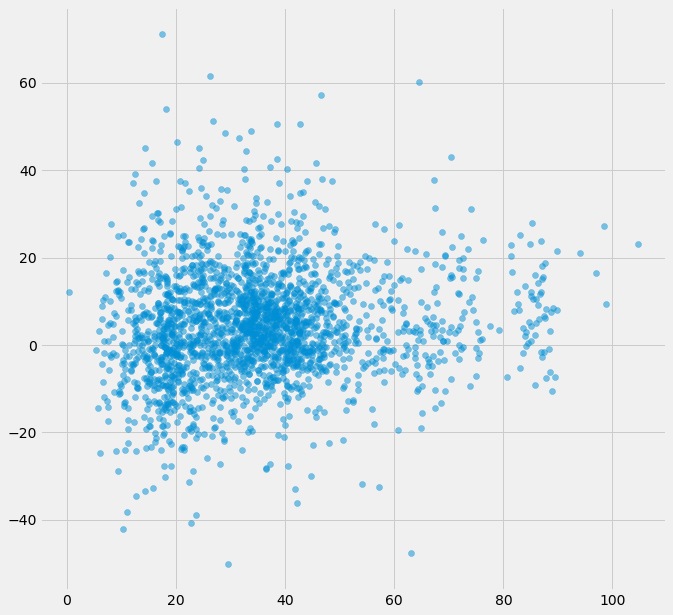

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Quoziente di incremento totale (x 1.000)"],alpha=0.5)
plt.show()

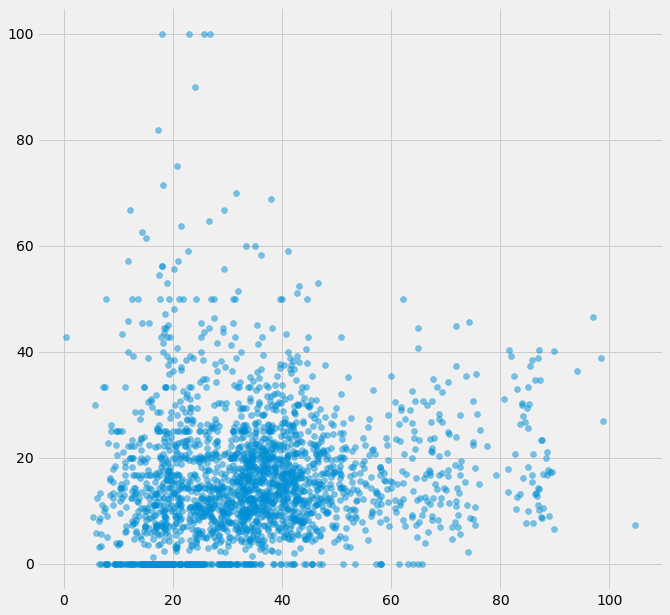

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Percentuale nati di cittadinanza non italiana"],alpha=0.5)
plt.show()

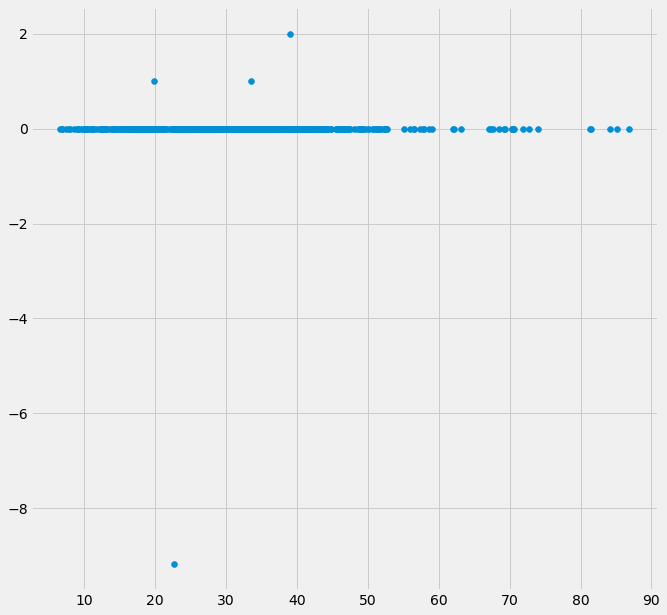

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione"])
plt.show()

In [22]:
df[df["Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione"]>0]

Unnamed: 0          comune  year  Produzione pro-capite Rifiuti Urbani  \
1537        1537           Poppi  2008                            589.013304   
2107        2107  Gambassi Terme  2010                            543.164300   
2235        2235           Prato  2010                            812.332470   

      Reddito imponibile medio per contribuente  \
1537                               20887.279740   
2107                               19528.964420   
2235                               22381.257024   

      Numero medio componenti per famiglie  % di Raccolta Differenziata  \
1537                              2.364188                    19.920517   
2107                              2.542753                    33.537979   
2235                              2.486781                    39.094835   

      Reddito imponibile medio per residente  \
1537                            11707.330219   
2107                            11578.734888   
2235                            12601.577067   

      Rapporto tra avviamenti/cessazioni (x 100)  \
1537                                   91.631799   
2107                                  211.958763   
2235                                  110.425116   

      Rapporto tra avviamenti/cessazioni di stranieri (x 100)  \
1537                                          91.228070         
2107                                         278.082192         
2235                                         135.831158         

      Tasso grezzo di disoccupazione (x100)  \
1537                              12.552198   
2107                              13.875155   
2235                              16.738837   

      Tasso grezzo di disoccupazione stranieri (x100)  \
1537                                        17.052980   
2107                                        14.652015   
2235                                        16.745283   

      Quoziente di incremento totale (x 1.000)  \
1537                                 13.462148   
2107                                  3.651116   
2235                                  6.451750   

      Percentuale nati di cittadinanza non italiana  \
1537                                      25.000000   
2107                                      22.500000   
2235                                      35.414481   

      Tasso di pensioni sociali e assegni sociali (x 100)  \
1537                                           4.722793     
2107                                           3.021719     
2235                                           5.289692     

      Percentuale studenti con esito negativo - secondaria II grado  \
1537                                          12.184874               
2107                                          11.224490               
2235                                          16.602877               

      Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione  \
1537                                                  0                                                                
2107                                                  0                                                                
2235                                                  0                                                                

      Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione  \
1537                                                  1                                                                         
2107                                                  1                                                                         
2235                                                  2                                                                         

      Percentuale di avviamenti a termine  \
1537                            80.365297   
2107                           102.237354   
2235         

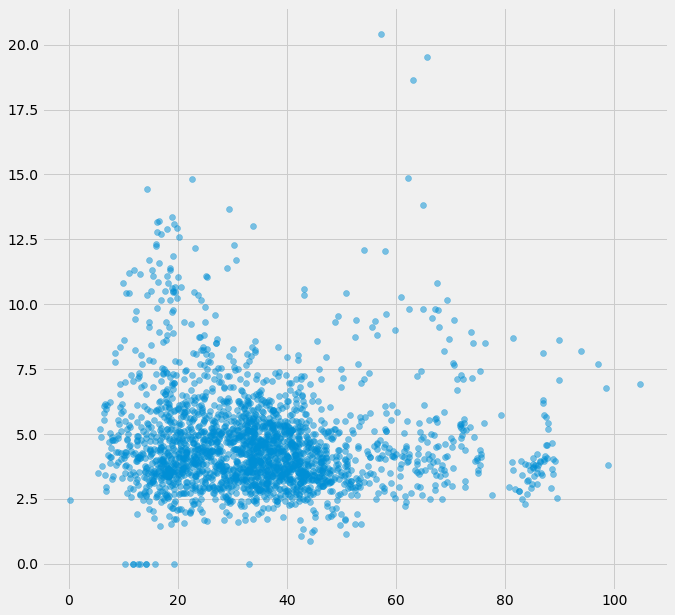

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Tasso di pensioni sociali e assegni sociali (x 100)"],alpha=0.5)
plt.show()

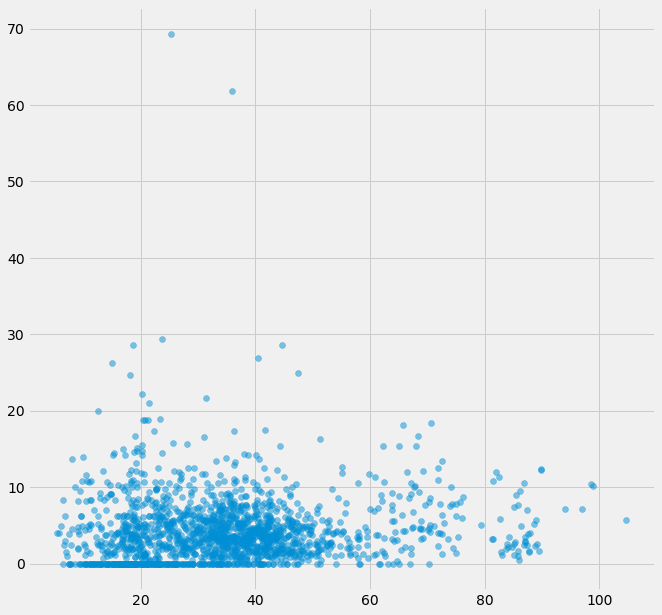

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Percentuale studenti con esito negativo - secondaria I grado"],alpha=0.5)
plt.show()

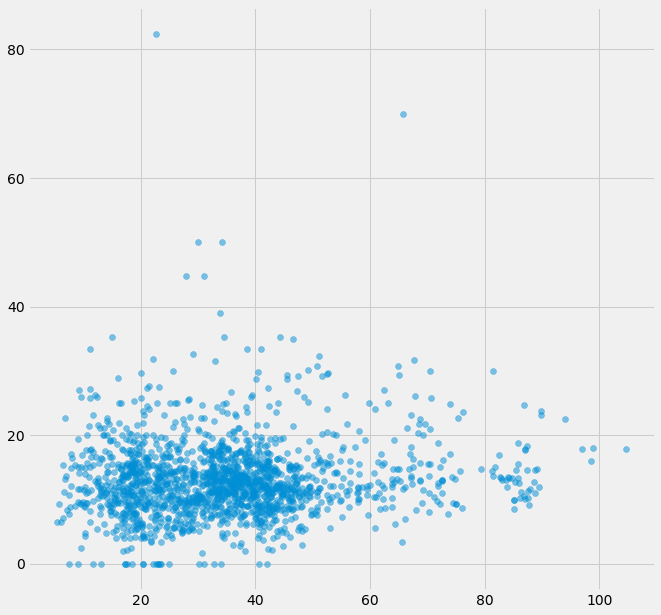

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Percentuale studenti con esito negativo - secondaria II grado"],alpha=0.5)
plt.show()

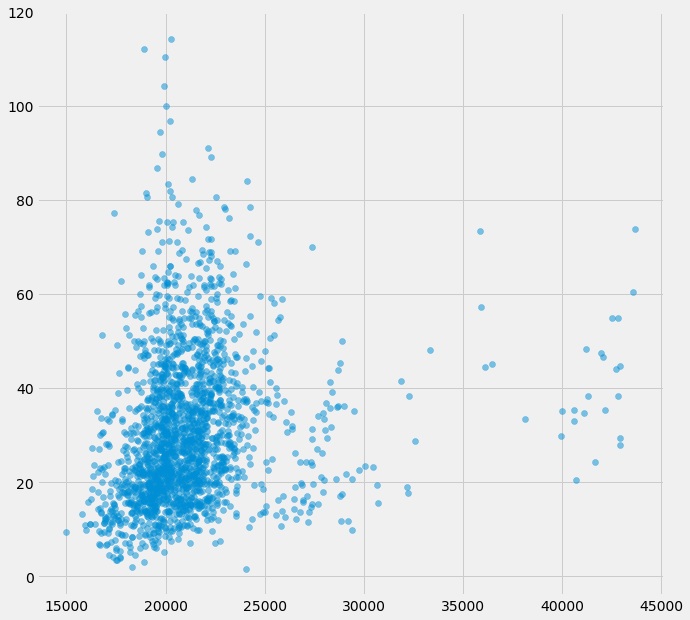

In [26]:
plt.figure(figsize=(10,10))
df_new = df[df["Tasso grezzo di disoccupazione (x100)"]<100]
plt.scatter(df_new["Reddito imponibile medio per contribuente"],df_new["Tasso grezzo di disoccupazione stranieri (x100)"],alpha=0.5)
plt.show()

**Analisi per Anno**

Esaminiamo ora anno per anno tutti gli indicatori.
Costruiamo dei boxplot che mostrano mediane e quantili per ogni indicatore anno dopo anno. 

/Library/Python/2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


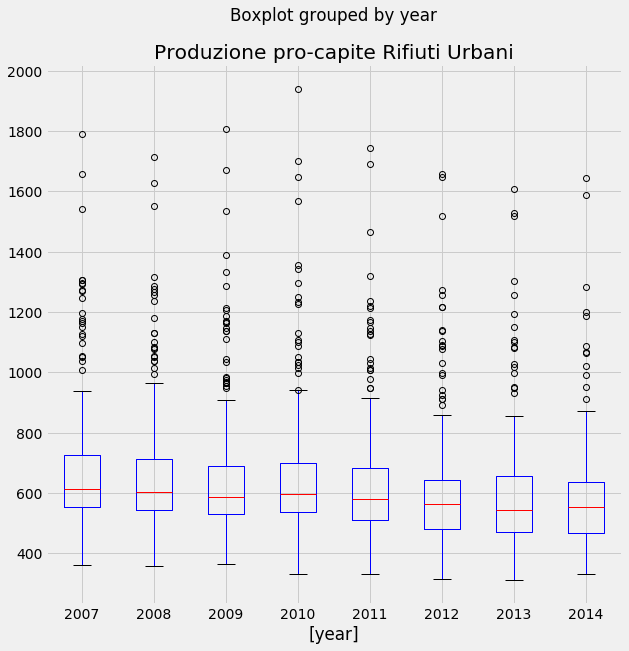

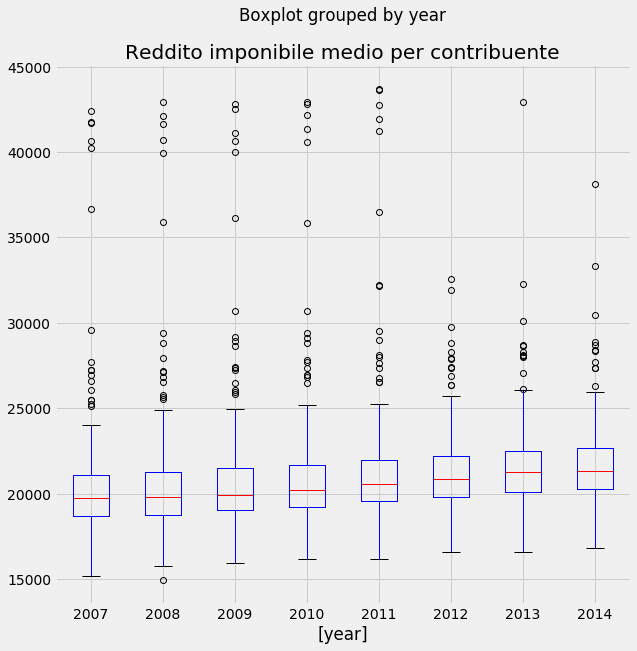

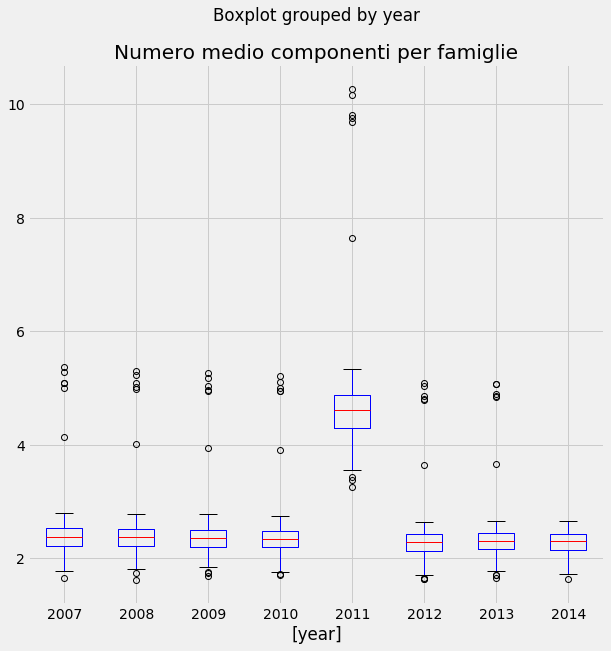

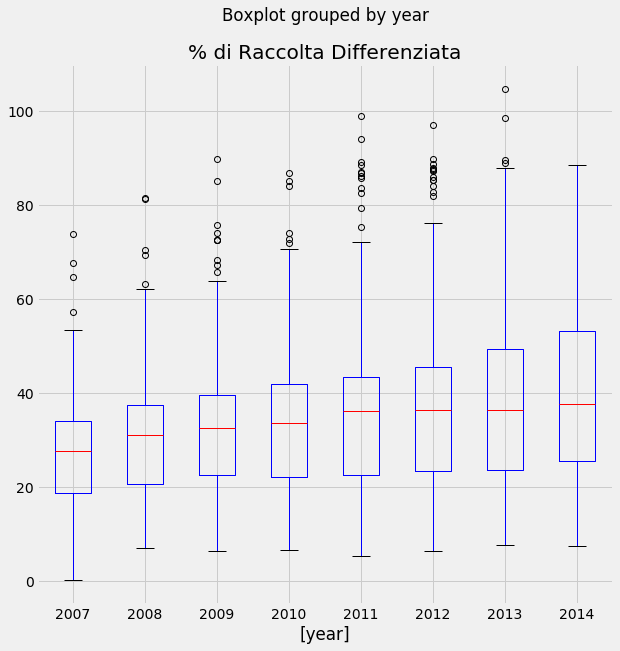

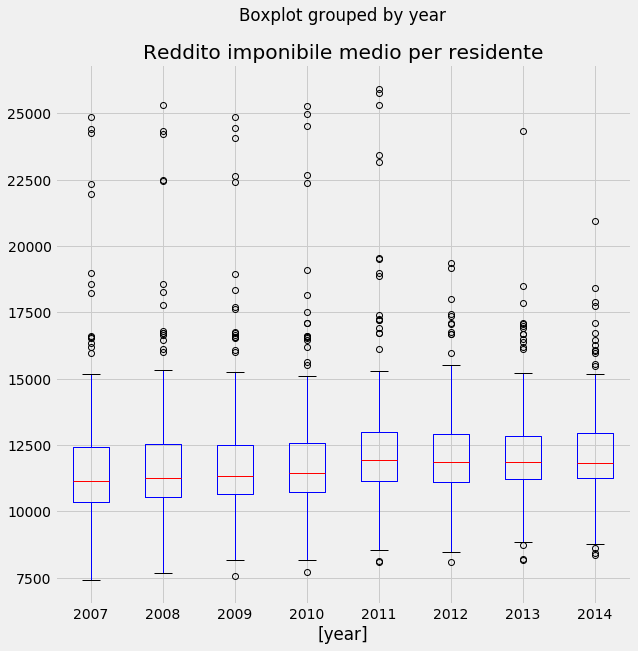

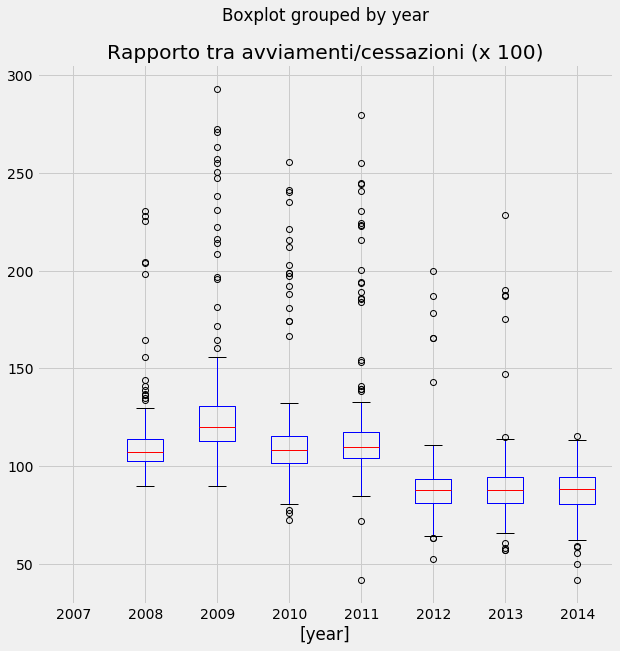

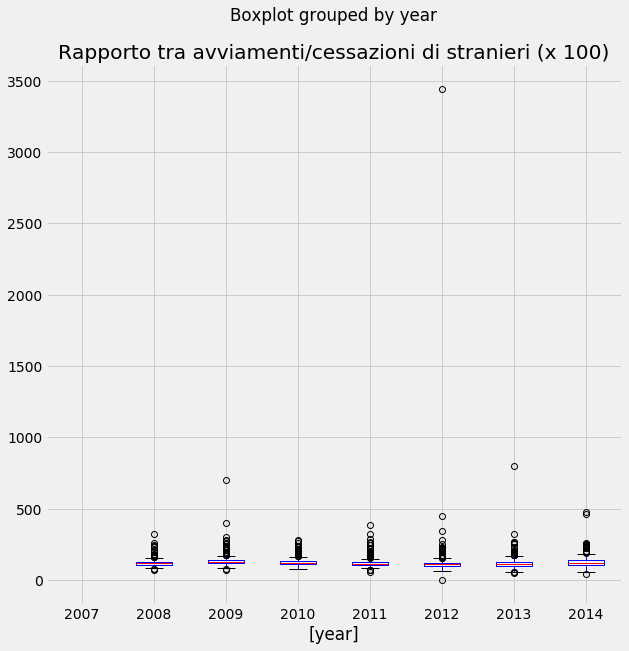

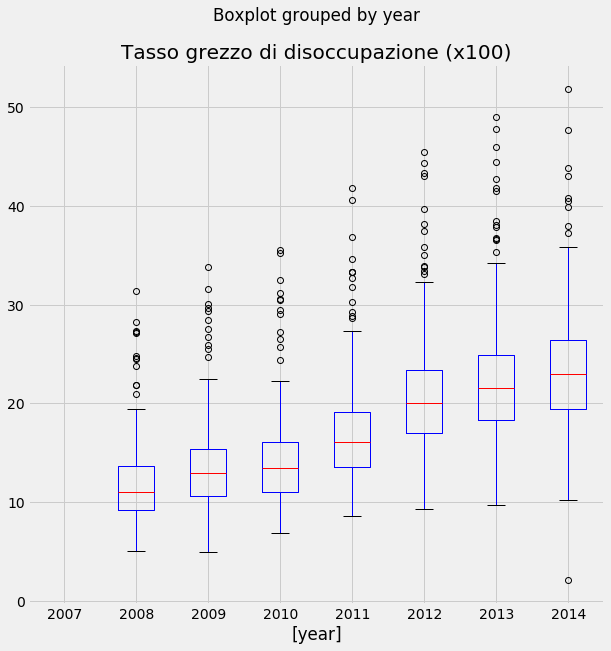

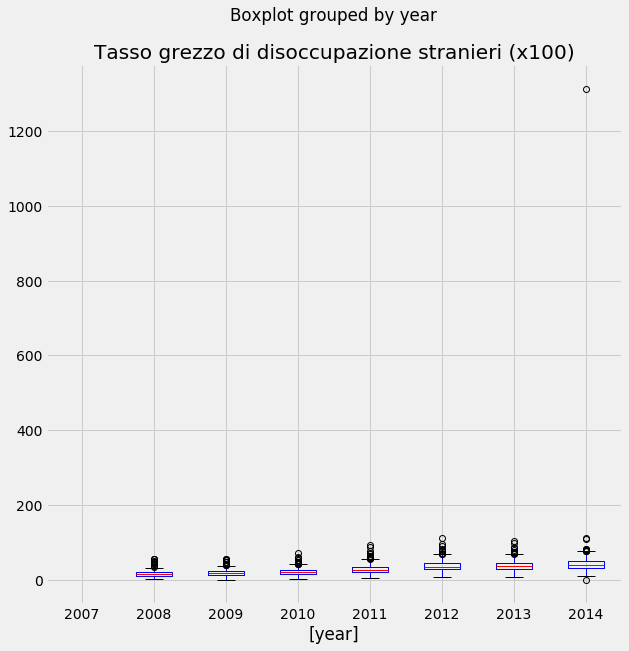

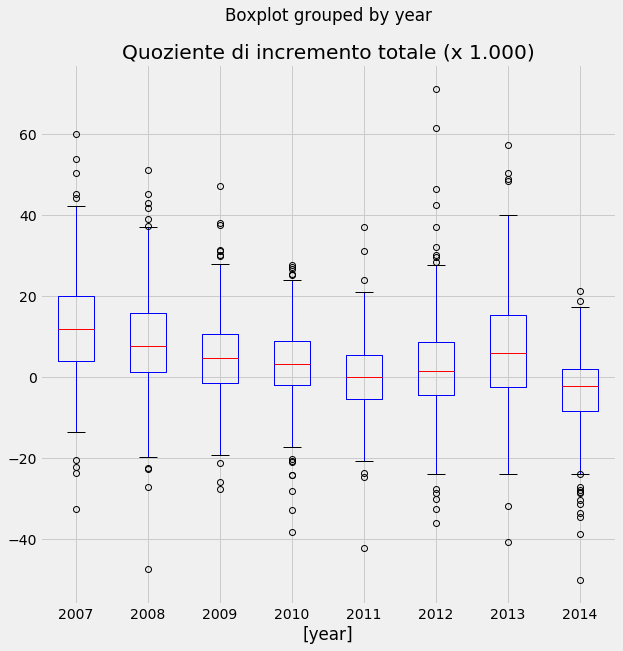

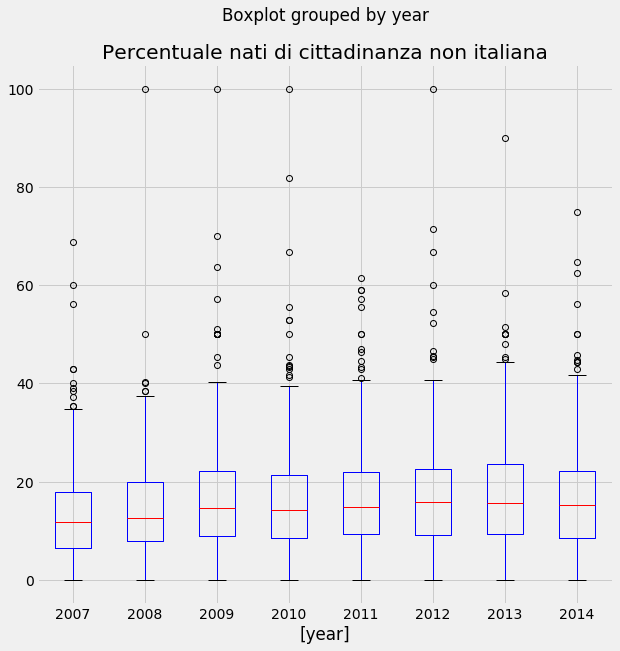

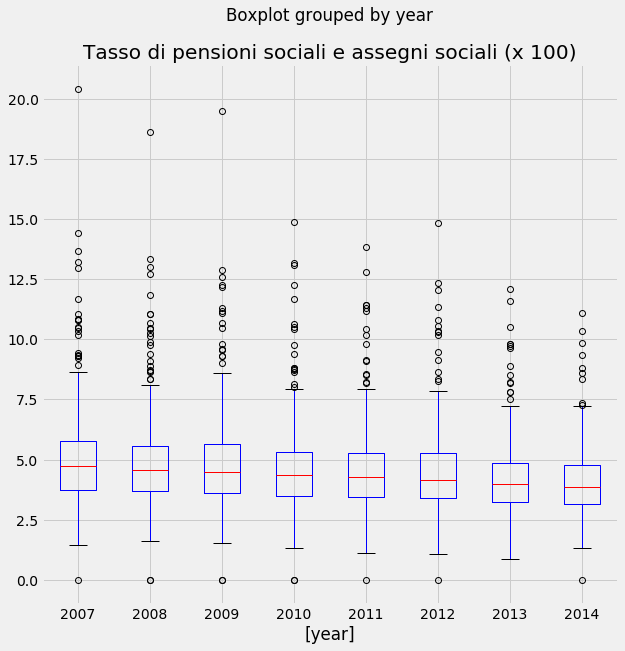

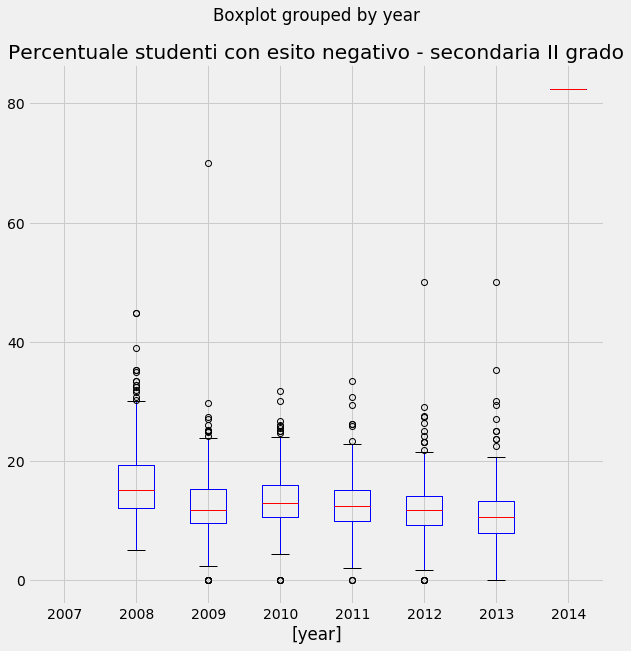

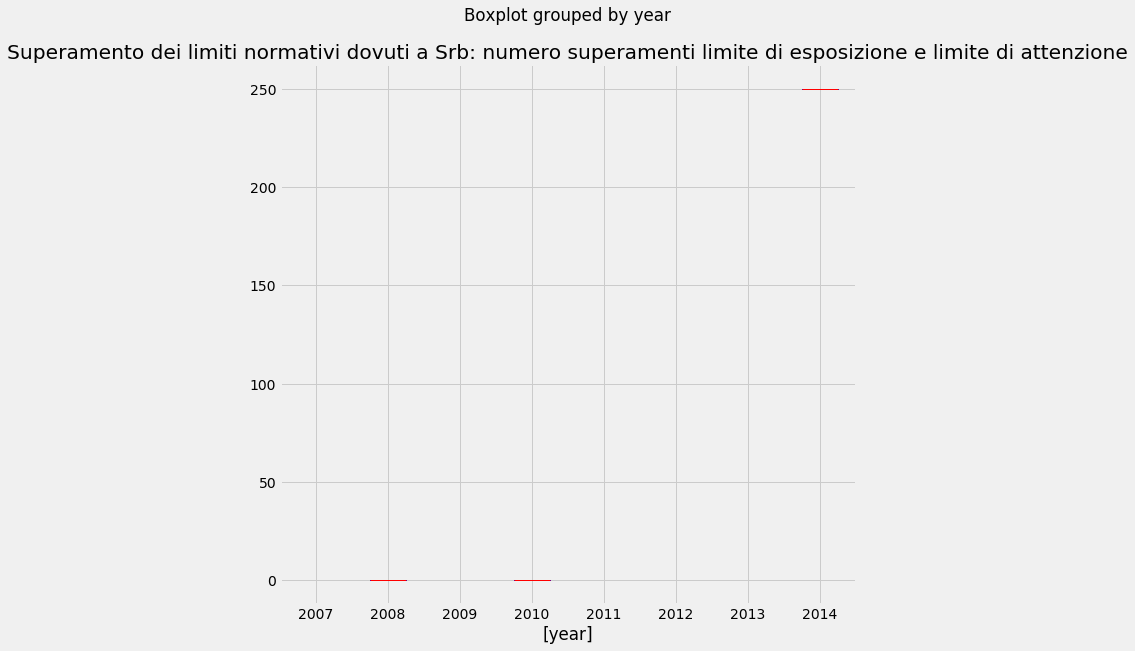

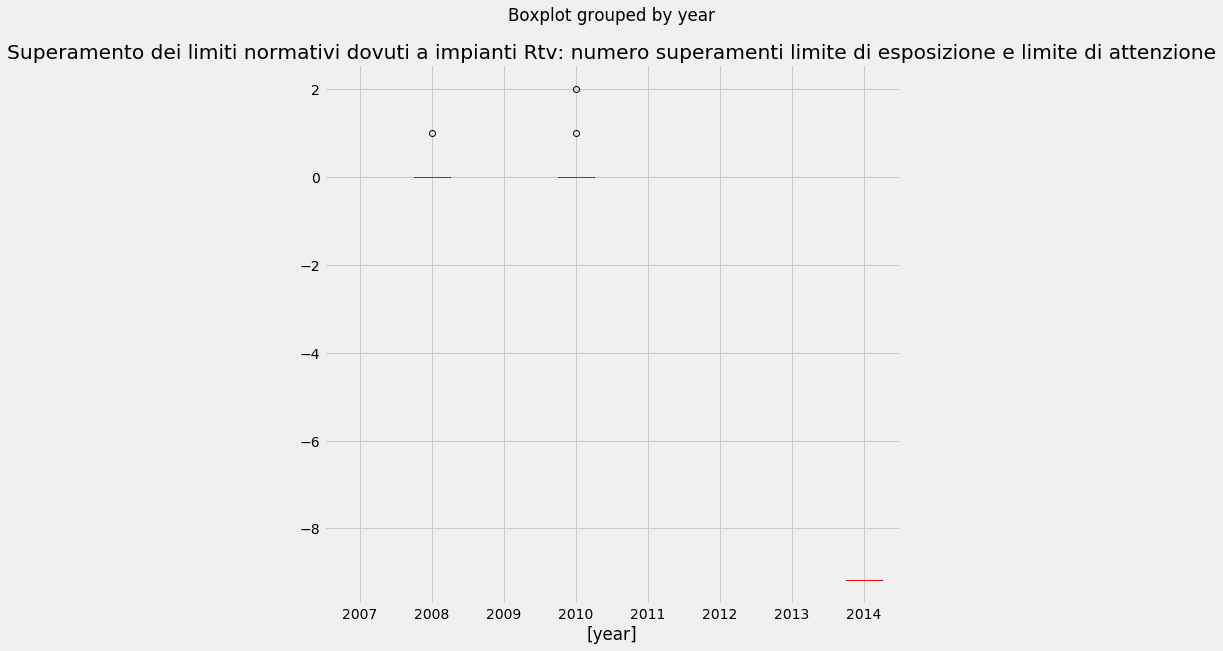

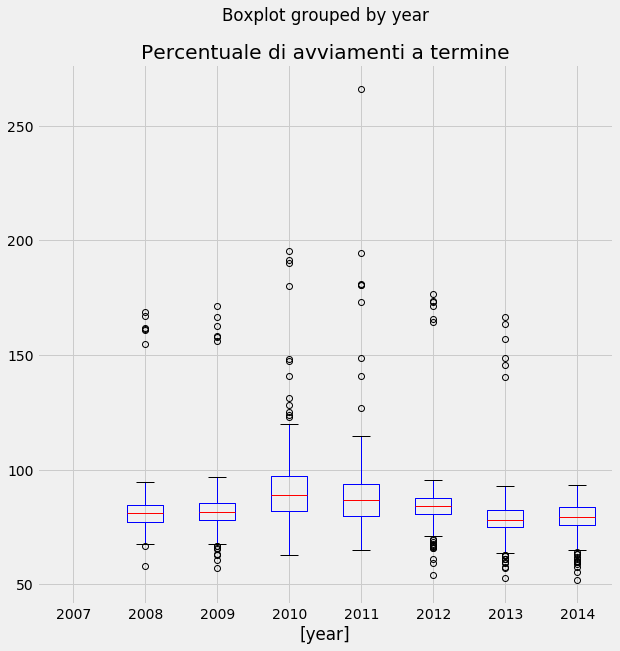

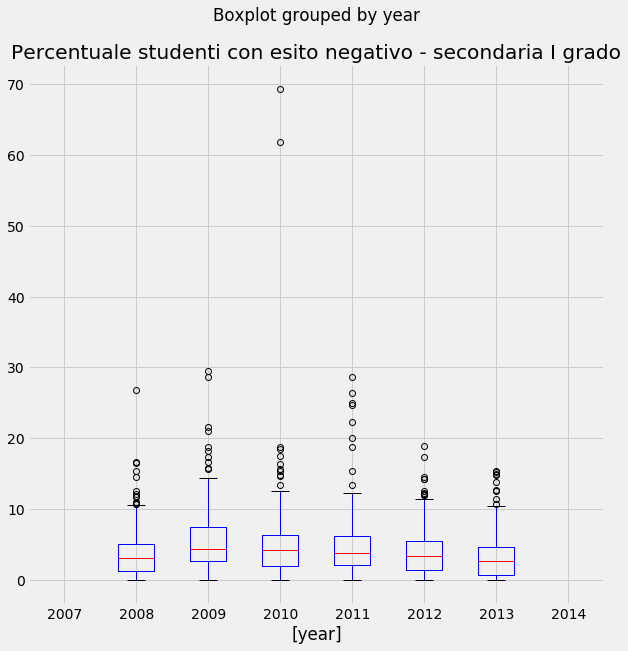

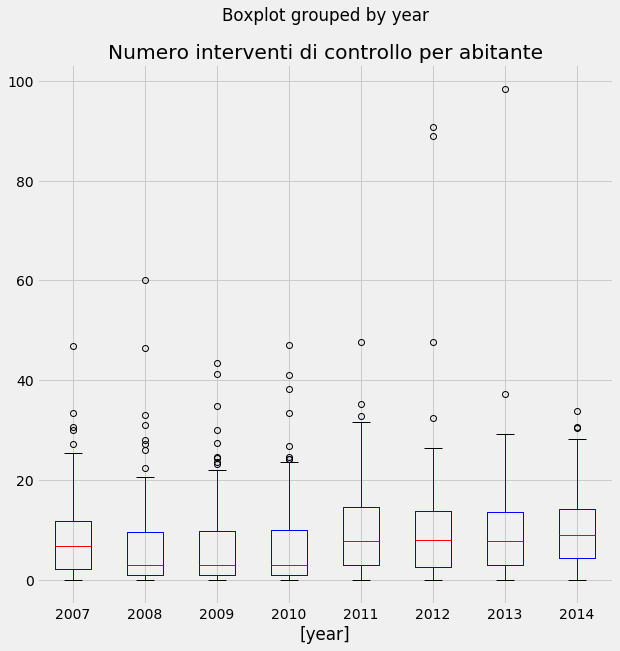

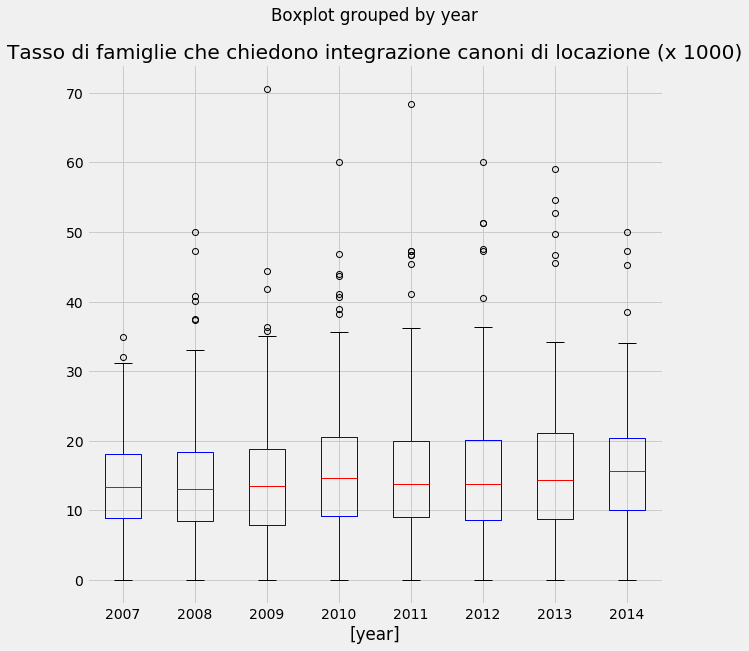

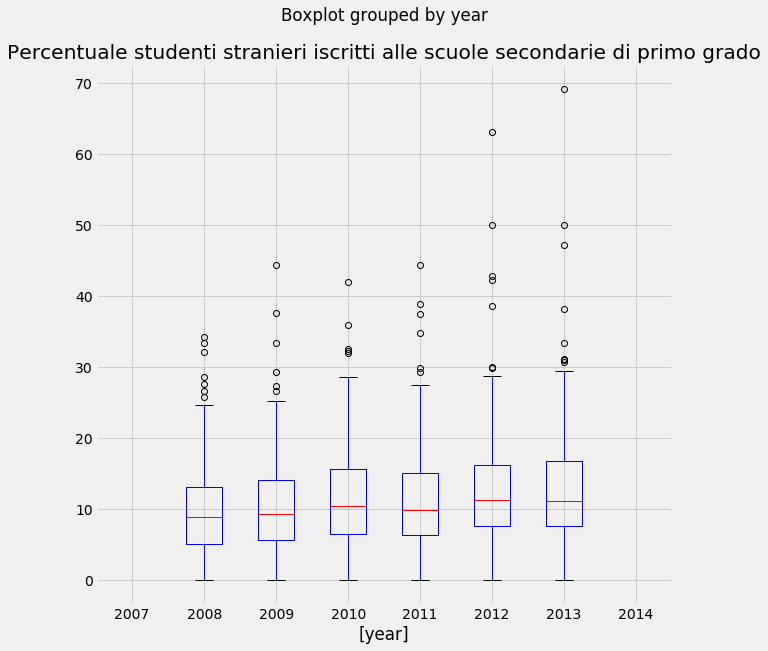

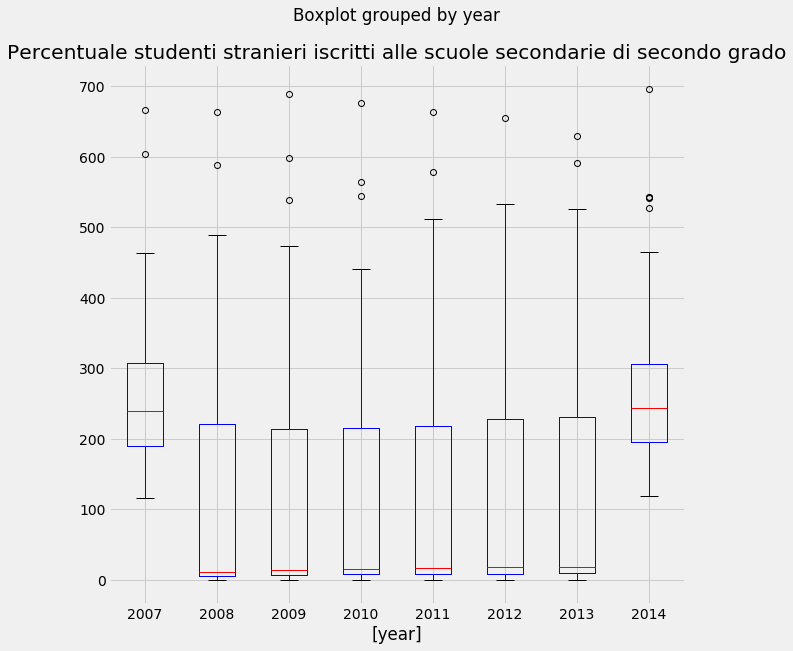

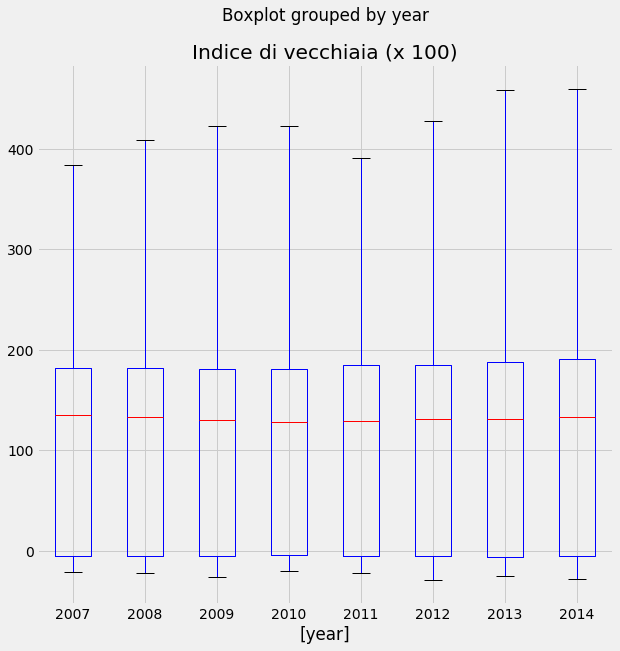

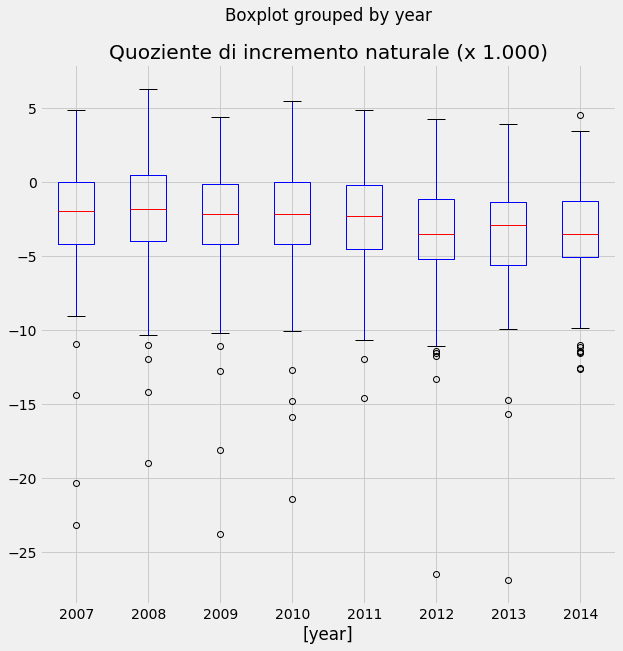

In [27]:
for k in df.keys()[3:]:
    df.boxplot(column=[k], by=['year'],figsize=(10,10)) 

Ci sono alcuni valori fuori scala che vanno esplorati:
- Tasso disoccupazione stranieri (sopra il 100%)
- Numero componenti famiglie 2011 (mediana spostata)

In [28]:
df[df['Tasso grezzo di disoccupazione stranieri (x100)'] > 100]

Unnamed: 0                     comune  year  \
999          999  Montecatini Val di Cecina  2014   
1158        1158              Rio nell'Elba  2013   
1159        1159              Rio nell'Elba  2014   
1525        1525               Montemignaio  2012   
1535        1535         Ortignano Raggiolo  2014   

      Produzione pro-capite Rifiuti Urbani  \
999                             743.347851   
1158                            509.797030   
1159                            736.516102   
1525                            740.598911   
1535                            644.003448   

      Reddito imponibile medio per contribuente  \
999                                19761.869522   
1158                               19927.756714   
1159                               20258.576037   
1525                               18921.184438   
1535                               19951.952651   

      Numero medio componenti per famiglie  % di Raccolta Differenziata  \
999                               2.101190                    28.141685   
1158                              1.707042                    18.960015   
1159                              1.748148                    37.195500   
1525                              1.700617                    15.754650   
1535                              2.259740                    44.024181   

      Reddito imponibile medio per residente  \
999                             11222.238122   
1158                            10407.813531   
1159                            11176.553390   
1525                            11915.882033   
1535                            12108.771264   

      Rapporto tra avviamenti/cessazioni (x 100)  \
999                                    81.795116   
1158                                   91.621622   
1159                                   99.736148   
1525                                   69.026549   
1535                                   41.696113   

      Rapporto tra avviamenti/cessazioni di stranieri (x 100)  \
999                                          101.211143         
1158                                         114.516129         
1159                                         101.369863         
1525                                         100.000000         
1535                                         128.571429         

      Tasso grezzo di disoccupazione (x100)  \
999                                     NaN   
1158                              48.969072   
1159                              51.851852   
1525                              30.372493   
1535                              24.818841   

      Tasso grezzo di disoccupazione stranieri (x100)  \
999                                       1311.570248   
1158                                       104.255319   
1159                                       114.285714   
1525                                       112.121212   
1535                                       110.344828   

      Quoziente di incremento totale (x 1.000)  \
999                                 -14.140271   
1158                                 25.577558   
1159                                -27.118644   
1525                                -32.667877   
1535                                -14.942529   

      Percentuale nati di cittadinanza non italiana  \
999                                        6.666667   
1158                                      16.666667   
1159                                      12.500000   
1525                                            NaN   
1535                                       0.000000   

      Tasso di pensioni sociali e assegni sociali (x 100)  \
999                                            2.238806     
1158                                           6.397306     
1159                                           7.046980     
1525                                           0.000000     
1535                                           3.317536     

      Percentuale studenti con esi

Sostituiamo i valori fuori scala con dei NaN.

In [29]:
df.set_value([999,1158,1159,1525,1535],'Tasso grezzo di disoccupazione stranieri (x100)',np.nan)
df.loc[[999,1158,1159,1525,1535]]['Tasso grezzo di disoccupazione stranieri (x100)']

999    NaN
1158   NaN
1159   NaN
1525   NaN
1535   NaN
Name: Tasso grezzo di disoccupazione stranieri (x100), dtype: float64

In [30]:
df[(df['year']==2011) & (df['Numero medio componenti per famiglie']>6)]

Unnamed: 0                     comune  year  \
36            36        Casciana Terme Lari  2011   
140          140     Fabbriche di Vergemoli  2011   
1012        1012         Crespina Lorenzana  2011   
1684        1684     Castelfranco Piandiscò  2011   
1988        1988  Figline e Incisa Valdarno  2011   
2052        2052      Scarperia e San Piero  2011   

      Produzione pro-capite Rifiuti Urbani  \
36                             1029.515347   
140                             978.878049   
1012                           1174.922845   
1684                           1006.224802   
1988                           1166.178300   
2052                           1214.179515   

      Reddito imponibile medio per contribuente  \
36                                 41217.822209   
140                                36473.236534   
1012                               42741.128135   
1684                               41949.338817   
1988                               43693.539262   
2052                               43600.382674   

      Numero medio componenti per famiglie  % di Raccolta Differenziata  \
36                                9.754565                    67.870761   
140                               7.650575                    64.957393   
1012                             10.161982                    55.667778   
1684                             10.273242                    75.310416   
1988                              9.818763                    93.980154   
2052                              9.689023                    64.995532   

      Reddito imponibile medio per residente  \
36                              23145.904685   
140                             18992.770732   
1012                            23413.515996   
1684                            25297.997045   
1988                            25764.694108   
2052                            25922.587716   

      Rapporto tra avviamenti/cessazioni (x 100)  \
36                                    222.899946   
140                                   194.326241   
1012                                  215.439430   
1684                                  244.461305   
1988                                  230.512249   
2052                                  245.106862   

      Rapporto tra avviamenti/cessazioni di stranieri (x 100)  \
36                                           259.233449         
140                                          266.666667         
1012                                         243.902439         
1684                                         384.905660         
1988                                         245.698925         
2052                                         227.027027         

      Tasso grezzo di disoccupazione (x100)  \
36                                31.746842   
140                               33.260394   
1012                              24.652778   
1684                              22.881900   
1988                              36.859426   
2052                              28.855215   

      Tasso grezzo di disoccupazione stranieri (x100)  \
36                                          48.339483   
140                                         45.161290   
1012                                        44.086022   
1684                                        47.530864   
1988                                        73.902133   
2052                                        60.424469   

      Quoziente di incremento totale (x 1.000)  \
36                                    9.531502   
140                                   9.756098   
1012                                  9.032744   
1684                                 16.886544   
1988                                 21.078093   
2052                                 17.334778   

      Percentuale nati di cittadinanza non italiana  \
36                                        23.762376   
140                                        0.000000   
1012                   

In [32]:
df[(df['year']==2010) & (df['Numero medio componenti per famiglie']>6)]

Empty DataFrame
Columns: [Unnamed: 0, comune, year, Produzione pro-capite Rifiuti Urbani, Reddito imponibile medio per contribuente, Numero medio componenti per famiglie, % di Raccolta Differenziata, Reddito imponibile medio per residente, Rapporto tra avviamenti/cessazioni (x 100), Rapporto tra avviamenti/cessazioni di stranieri (x 100), Tasso grezzo di disoccupazione (x100), Tasso grezzo di disoccupazione stranieri (x100), Quoziente di incremento totale (x 1.000), Percentuale nati di cittadinanza non italiana, Tasso di pensioni sociali e assegni sociali (x 100), Percentuale studenti con esito negativo - secondaria II grado, Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione, Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione, Percentuale di avviamenti a termine, Percentuale studenti con esito negativo - secondaria I grado, Numero interventi di controllo per abitante, Tasso di famiglie che chiedono integrazione canoni di locazione (x 1000), Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado, Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado, Indice di vecchiaia (x 100), Quoziente di incremento naturale (x 1.000)]
Index: []

In [34]:
df[df.comune=="Scarperia e San Piero"]

Unnamed: 0                 comune  year  \
2048        2048  Scarperia e San Piero  2007   
2049        2049  Scarperia e San Piero  2008   
2050        2050  Scarperia e San Piero  2009   
2051        2051  Scarperia e San Piero  2010   
2052        2052  Scarperia e San Piero  2011   
2053        2053  Scarperia e San Piero  2012   
2054        2054  Scarperia e San Piero  2013   
2055        2055  Scarperia e San Piero  2014   

      Produzione pro-capite Rifiuti Urbani  \
2048                           1273.888413   
2049                           1266.859224   
2050                           1213.886811   
2051                           1296.073964   
2052                           1214.179515   
2053                           1140.821417   
2054                           1149.305265   
2055                            578.198635   

      Reddito imponibile medio per contribuente  \
2048                               42378.095349   
2049                               42917.633075   
2050                               42820.494347   
2051                               42908.660311   
2052                               43600.382674   
2053                               22182.853994   
2054                               22313.231367   
2055                               22394.295737   

      Numero medio componenti per famiglie  % di Raccolta Differenziata  \
2048                              5.005599                    67.549874   
2049                              4.973122                    69.263346   
2050                              4.946890                    67.216825   
2051                              4.937129                    67.627052   
2052                              9.689023                    64.995532   
2053                              4.782974                    66.498856   
2054                              4.852373                    68.701261   
2055                              2.414400                    35.776620   

      Reddito imponibile medio per residente  \
2048                            24873.468766   
2049                            25323.075724   
2050                            24863.857226   
2051                            25265.599637   
2052                            25922.587716   
2053                            13136.720070   
2054                            13023.558622   
2055                            13179.074354   

      Rapporto tra avviamenti/cessazioni (x 100)  \
2048                                         NaN   
2049                                  198.012422   
2050                                  214.126880   
2051                                  241.095890   
2052                                  245.106862   
2053                                  200.000000   
2054                                  228.234137   
2055                                   98.058691   

      Rapporto tra avviamenti/cessazioni di stranieri (x 100)  \
2048                                                NaN         
2049                                         213.249211         
2050                                         210.108303         
2051                                         217.993080         
2052                                         227.027027         
2053                                         279.629630         
2054                                         326.164875         
2055                                         144.036697         

      Tasso grezzo di disoccupazione (x100)  \
2048                                    NaN   
2049                              17.378991   
2050                              20.971609   
2051                              22.272385   
2052                              28.855215   
2053                              33.772485   
2054                              36.536030   
2055                              19.245379   

      Tasso grezzo di disoccupazione stranieri (x100)  \
2048                                        

In [36]:
df[df.comune=="Firenze"]

Unnamed: 0   comune  year  Produzione pro-capite Rifiuti Urbani  \
1408        1408  Firenze  2007                            718.798772   
1409        1409  Firenze  2008                            709.260185   
1410        1410  Firenze  2009                            676.738420   
1411        1411  Firenze  2010                            687.993143   
1412        1412  Firenze  2011                            689.335774   
1413        1413  Firenze  2012                            635.516489   
1414        1414  Firenze  2013                            616.501168   
1415        1415  Firenze  2014                            627.064626   

      Reddito imponibile medio per contribuente  \
1408                               26929.568181   
1409                               27141.699163   
1410                               27422.289300   
1411                               27822.280337   
1412                               28131.825549   
1413                               28281.812886   
1414                               28632.039789   
1415                               28701.180098   

      Numero medio componenti per famiglie  % di Raccolta Differenziata  \
1408                              2.036873                    31.669723   
1409                              2.028861                    34.275108   
1410                              2.008393                    36.489217   
1411                              1.998223                    38.382815   
1412                              3.907693                    40.065769   
1413                              1.883106                    39.660216   
1414                              1.998989                    43.279257   
1415                              2.005480                    45.828361   

      Reddito imponibile medio per residente  \
1408                            16581.425102   
1409                            16720.923831   
1410                            16550.782283   
1411                            16609.575091   
1412                            17400.070808   
1413                            17053.120580   
1414                            16686.506886   
1415                            16457.285607   

      Rapporto tra avviamenti/cessazioni (x 100)  \
1408                                         NaN   
1409                                  104.973720   
1410                                  116.796439   
1411                                  115.770527   
1412                                  121.166532   
1413                                  100.022975   
1414                                  113.694212   
1415                                  103.486779   

      Rapporto tra avviamenti/cessazioni di stranieri (x 100)  \
1408                                                NaN         
1409                                         113.794482         
1410                                         123.156146         
1411                                         116.932835         
1412                                         113.867817         
1413                                         123.542451         
1414                                         143.182507         
1415                                         133.195040         

      Tasso grezzo di disoccupazione (x100)  \
1408                                    NaN   
1409                               9.507024   
1410                              11.162654   
1411                              12.078978   
1412                              14.879360   
1413                              18.265324   
1414                              19.478726   
1415                              19.341167   

      Tasso grezzo di disoccupazione stranieri (x100)  \
1408                                              NaN   
1409                                        17.014997   
1410                                        19.667619   
1411                                        21.039676   
1412           

In [44]:
df = df.drop('Unnamed: 0',1)

In [47]:
df = df.fillna('')

In [48]:
df_dict = df.to_dict(orient='records')

In [49]:
df_dict

[{'% di Raccolta Differenziata': 15.614981108499999,
  'Indice di vecchiaia (x 100)': 133.06666666700002,
  'Numero interventi di controllo per abitante': '',
  'Numero medio componenti per famiglie': 2.6306620209,
  'Percentuale di avviamenti a termine': '',
  'Percentuale nati di cittadinanza non italiana': 12.5,
  'Percentuale studenti con esito negativo - secondaria I grado': '',
  'Percentuale studenti con esito negativo - secondaria II grado': '',
  'Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado': '',
  'Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado': '',
  'Produzione pro-capite Rifiuti Urbani': 515.818353832,
  'Quoziente di incremento naturale (x 1.000)': 2.8382213813,
  'Quoziente di incremento totale (x 1.000)': 15.1371807001,
  'Rapporto tra avviamenti/cessazioni (x 100)': '',
  'Rapporto tra avviamenti/cessazioni di stranieri (x 100)': '',
  'Reddito imponibile medio per contribuente': 18679.9735874,
  'Redd

In [51]:
metadata = dict() 
metadata["date"] = "18052017"
metadata["source"] = "regione toscana"

In [52]:
metadata

{'date': '18052017', 'source': 'regione toscana'}

In [55]:
final_dict = dict()

final_dict["metadata"] = metadata
final_dict["data"] = df_dict

In [56]:
final_dict

{'data': [{'% di Raccolta Differenziata': 15.614981108499999,
   'Indice di vecchiaia (x 100)': 133.06666666700002,
   'Numero interventi di controllo per abitante': '',
   'Numero medio componenti per famiglie': 2.6306620209,
   'Percentuale di avviamenti a termine': '',
   'Percentuale nati di cittadinanza non italiana': 12.5,
   'Percentuale studenti con esito negativo - secondaria I grado': '',
   'Percentuale studenti con esito negativo - secondaria II grado': '',
   'Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado': '',
   'Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado': '',
   'Produzione pro-capite Rifiuti Urbani': 515.818353832,
   'Quoziente di incremento naturale (x 1.000)': 2.8382213813,
   'Quoziente di incremento totale (x 1.000)': 15.1371807001,
   'Rapporto tra avviamenti/cessazioni (x 100)': '',
   'Rapporto tra avviamenti/cessazioni di stranieri (x 100)': '',
   'Reddito imponibile medio per contribuente'